In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
# It's also possible to use the reduced notation by directly setting font.family:
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [11]:
try:
    os.mkdir("figures")
except OSError as error:
    print(error)
try:
    os.mkdir("post_process_files")
except OSError as error:
    print(error)

[WinError 183] Cannot create a file when that file already exists: 'figures'
[WinError 183] Cannot create a file when that file already exists: 'post_process_files'


In [12]:
def countX(lst, x):
    if lst.count(x):
        return lst.count(x)
    else:
        return 1

## Modified Algorithm:

In [14]:
frame_no = []
line_counter = 0
iter = 0
part_id = [] #stores the particle id for each frame
currcluster_id = [] #stores the cluster ID for the current frame
oldcluster_id=[] #stores the the cluster ID for the previous frame
curr_coord = [] #stores the coordination number for the current frame 
old_coord = [] #stores the coordination number for the previous frame
size = [] #stores the sizes of each cluster ID
avg_len = [] #average length of the chain
max_len = [] #maximum length of the chain
migration = [] #stores the number of times there is a change between the surrent and the previous cluster ID
curr_particle_cluster_size = [] #stores the chain size that the particle belongs to
old_particle_cluster_size = []
dimer = [] #stores the number of dimers in each frame
trimer = [] #stores the number of trimers in each frame
hexamer = [] #stores the number of 6-mers in each frame
elongation = [] #stores elongation instance for each frame
fragmentation = [] #stores fragmentation instance for each frame
depoly = [] #stores depolymerization instance for each frame
curr_chain_counter = 0
old_chain_counter = 0
f_elon = 0
f_frag = 0
f_depo = 0
iter = 0
file1 = open("cluster.dat","r")
file2 = open("coord.dat","r")
c_file = open("post_process_files/cluster_dynamic_stat.dat","w")
print("time_frame   elongation  fragmentation   depolymerization",file = c_file)
p_file = open("post_process_files/particle_cluster_size.dat","w")
print("Size of the cluster each particle ID belongs to",file = p_file)
m_file = open("analysis_files/monomer_conc.dat","w")
print("time_frame   Monomer_No",file = m_file)
f_file = open("post_process_files/fragmentation_stat.dat","w")
print("Time_frame   fragmentation",file = f_file)
for line,line2 in zip(file1,file2):
    line_counter = line_counter + 1
    if line_counter==2:
        frame_no.append(int(line))
        print(int(line),file = p_file)
    if (line_counter>9)&(line_counter <= 1009):
        f_list = [float(i) for i in line.split()]
        n_list = [float(i) for i in line2.split()]
        part_id.append(f_list[0])
        currcluster_id.append(f_list[1])
        curr_coord.append(n_list[1])
    if (line_counter == 1009):
        part_index = [0]
        change_count = 0
        line_counter = 0
        for i in range(0,len(part_id)):
            size.append(countX(currcluster_id,part_id[i]))
            curr_particle_cluster_size.append(countX(currcluster_id,currcluster_id[i]))
            print(int(part_id[i]),"  ",curr_particle_cluster_size[i], file = p_file) 
        avg_len.append(np.average(size,weights = size)) #weighted average
        for k in range(0,len(size)):
            if size[k] >= 2:
                curr_chain_counter += 1
        
        #avg_len.append(np.mean(size))  #regular mean
        max_len.append(np.max(size))
        print(frame_no[iter],"   ",countX(curr_particle_cluster_size,1),file = m_file)
        dimer.append(countX(curr_particle_cluster_size,2)/2)
        trimer.append(countX(curr_particle_cluster_size,3)/3)
        hexamer.append(countX(curr_particle_cluster_size,6)/6)
        if iter >= 1:
            
            part_index = [0]
            for j in range(0,len(oldcluster_id)):
                if oldcluster_id[j]!=currcluster_id[j]:
                    change_count += 1
            f_elon = 0
            f_frag = 0
            f_depo = 0
            for k in range(0,len(curr_particle_cluster_size)):
                if part_id[k] not in part_index:
                    part_index.append(part_id[k])
                    if curr_particle_cluster_size[k] > old_particle_cluster_size[k]:
                        f_elon += 1
                        for q in range(0,len(curr_particle_cluster_size)):
                            if (currcluster_id[k]==currcluster_id[q]) & (part_id[q] not in part_index):
                                part_index.append(part_id[q])
                    elif (curr_particle_cluster_size[k] < old_particle_cluster_size[k]) & (curr_coord[k] != 0):# & (old_particle_cluster_size[k] > 3):
                        f_frag += 1
                        for q in range(0,len(curr_particle_cluster_size)):
                            if (currcluster_id[k]==currcluster_id[q]) & (part_id[q] not in part_index):
                                part_index.append(part_id[q])
                    elif (curr_particle_cluster_size[k] < old_particle_cluster_size[k]) & (curr_coord[k] == 0):# & (old_particle_cluster_size[k] > 2):
                        f_depo += 1
                        for q in range(0,len(curr_particle_cluster_size)):
                            if (currcluster_id[k]==currcluster_id[q]) & (part_id[q] not in part_index):
                                part_index.append(part_id[q])
            
            if curr_chain_counter > old_chain_counter:
                N_frag = curr_chain_counter-old_chain_counter
            else:
                N_frag = 0
            print(frame_no[iter],"   ",N_frag,file = f_file)
        
                    
        old_chain_counter = curr_chain_counter
        curr_chain_counter = 0                                      
        elongation.append(f_elon)
        fragmentation.append(f_frag)
        depoly.append(f_depo)                    
        migration.append(change_count)
        oldcluster_id = currcluster_id
        old_coord = curr_coord
        old_particle_cluster_size = curr_particle_cluster_size
        part_id = []
        currcluster_id = []
        curr_coord = []
        size = []
        curr_particle_cluster_size =[]
        
        iter += 1
        
for j in range(0,len(frame_no)):
    print(frame_no[j]," ",elongation[j],"   ",fragmentation[j],"    ",depoly[j],file=c_file)
c_file.close()
p_file.close()
m_file.close()
f_file.close()
print(part_index)        

[0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0, 32.0, 35.0, 38.0, 41.0, 44.0, 47.0, 50.0, 53.0, 56.0, 59.0, 62.0, 65.0, 68.0, 71.0, 74.0, 77.0, 80.0, 83.0, 86.0, 89.0, 92.0, 95.0, 98.0, 101.0, 104.0, 107.0, 110.0, 113.0, 116.0, 119.0, 122.0, 125.0, 128.0, 131.0, 134.0, 137.0, 140.0, 143.0, 146.0, 149.0, 152.0, 155.0, 158.0, 161.0, 164.0, 167.0, 170.0, 173.0, 176.0, 179.0, 662.0, 1181.0, 1385.0, 182.0, 185.0, 188.0, 191.0, 194.0, 197.0, 200.0, 203.0, 206.0, 209.0, 212.0, 215.0, 218.0, 221.0, 224.0, 227.0, 230.0, 233.0, 236.0, 239.0, 242.0, 245.0, 248.0, 251.0, 254.0, 257.0, 260.0, 263.0, 266.0, 269.0, 272.0, 275.0, 278.0, 281.0, 284.0, 287.0, 290.0, 293.0, 296.0, 299.0, 302.0, 305.0, 308.0, 311.0, 314.0, 317.0, 320.0, 323.0, 326.0, 329.0, 332.0, 335.0, 338.0, 341.0, 344.0, 347.0, 350.0, 353.0, 356.0, 359.0, 362.0, 365.0, 368.0, 371.0, 374.0, 377.0, 380.0, 383.0, 386.0, 389.0, 392.0, 395.0, 398.0, 401.0, 404.0, 407.0, 410.0, 413.0, 416.0, 419.0, 422.0, 425.0, 428.0, 431.0, 4

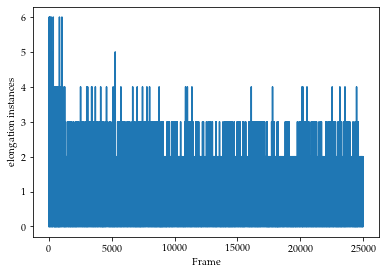

In [ ]:
#fig = plt.figure()
#ax = fig.add_axes([0.15,0.15,0.80,0.80])
#ax.plot(elongation)
#plt.xlabel("Frame")
#plt.ylabel("elongation instances")
#plt.savefig('figures/elongation_inst.png',dpi = 600)

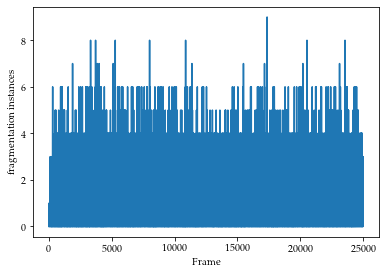

In [ ]:
#fig = plt.figure()
#ax = fig.add_axes([0.15,0.15,0.80,0.80])
#ax.plot(fragmentation)
#plt.xlabel("Frame")
#plt.ylabel("fragmentation instances")
#plt.savefig('figures/fragmentation_inst.png',dpi = 600)

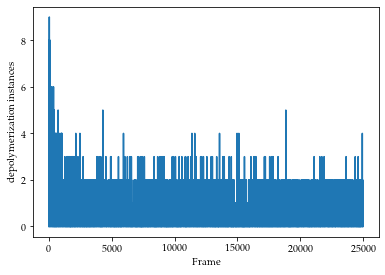

In [ ]:
#fig = plt.figure()
#ax = fig.add_axes([0.15,0.15,0.80,0.80])
#ax.plot(depoly)
#plt.xlabel("Frame")
#plt.ylabel("depolymerization instances")
#plt.savefig('figures/depoly_inst.png',dpi = 600)

# Depolymerization algorithm:
1. We have data for cluster ID and the coordination number of each particle at different timesteps.
&nbsp;
&nbsp;
2. We compare the cluster ID of a particle at the current time step to the cluster ID of the same particle at a previous time step.
&nbsp;
&nbsp;
3. If the cluster ID is different, it means that this particle belongs to a different chain than what was in the previous time step.
&nbsp;
&nbsp;
4. We identify the particle ID and then go back to the coordination number data of the particle at the current and the previous step.
&nbsp;
&nbsp;
5. If the coordination number of that particle:
&nbsp;
&nbsp;
***
>        a) changes from 2 to 1    :   the particle belonged in the middle of a chain previously and now blongs to  the end of a chain. This could either be migration between chains or fragmentation.

>        b) changes from 1 to 2    :   the particle was at the end of the chain and now belongs to the middle of a > chain. This could be because of elongation also.
        
>        c) changes from 1 to 0    :   the particle was at the end of the chain and now its a free monomer.     therefore if we count the number of such occurences between different timesteps, we have the depolymerization rate.
***

def Block_Average(data,Max_block_Size=2):
    block_Mean = np.zeros(Max_block_Size)
    block_Var = np.zeros(Max_block_Size)
    block_sig = np.zeros(Max_block_Size)
    block_Err = np.zeros(Max_block_Size)
    Size = np.arange(1,Max_block_Size+1)
    for block_Size in Size:
        Nb = int(len(data)/block_Size)
        b_mean = np.zeros(Nb)
        for j in range(1,Nb+1):
            ibeg = (j-1) * block_Size
            iend = ibeg + block_Size
            b_mean[j-1] = np.mean(data[ibeg:iend])
        block_Mean[block_Size-1] = np.mean(b_mean)
        block_Var[block_Size-1] = np.var(b_mean)/(Nb-1)
        block_sig[block_Size-1] = np.sqrt(block_Var[block_Size-1])
        block_Err[block_Size-1] = block_sig[block_Size-1]/np.sqrt(Nb)
    return Size,block_Mean,block_sig,block_Err

## The code box below is the original algorithm


frame_no = []
line_counter = 0
iter = 0
part_id = [] #stores the particle id for each frame
currcluster_id = [] #stores the cluster ID for the current frame
oldcluster_id=[] #stores the the cluster ID for the previous frame
curr_coord = [] #stores the coordination number for the current frame 
old_coord = [] #stores the coordination number for the previous frame
size = [] #stores the sizes of each cluster ID
avg_len = [] #average length of the chain
max_len = [] #maximum length of the chain
migration = [] #stores the number of times there is a change between the surrent and the previous cluster ID
curr_particle_cluster_size = [] #stores the chain size that the particle belongs to
old_particle_cluster_size = []
dimer = [] #stores the number of dimers in each frame
trimer = [] #stores the number of trimers in each frame
hexamer = [] #stores the number of 6-mers in each frame
elongation = [] #stores elongation instance for each frame
fragmentation = [] #stores fragmentation instance for each frame
depoly = [] #stores depolymerization instance for each frame
f_elon = 0
f_frag = 0
f_depo = 0
iter = 0
file1 = open("cluster.dat","r")
file2 = open("coord.dat","r")
for line,line2 in zip(file1,file2):
    line_counter = line_counter + 1
    if line_counter==2:
        frame_no.append(int(line))
    if (line_counter>9)&(line_counter <= 1009):
        f_list = [float(i) for i in line.split()]
        n_list = [float(i) for i in line2.split()]
        part_id.append(f_list[0])
        currcluster_id.append(f_list[1])
        curr_coord.append(n_list[1])
    if (line_counter == 1009):
        part_index = [0]
        change_count = 0
        line_counter = 0
        for i in range(0,len(part_id)):
            size.append(countX(currcluster_id,part_id[i]))
            curr_particle_cluster_size.append(countX(currcluster_id,currcluster_id[i])) 
        avg_len.append(np.mean(size))
        max_len.append(np.max(size))
        dimer.append(countX(curr_particle_cluster_size,2))
        trimer.append(countX(curr_particle_cluster_size,3))
        hexamer.append(countX(curr_particle_cluster_size,6))
        if iter >= 1:
            part_index = [0]
            for j in range(0,len(oldcluster_id)):
                if oldcluster_id[j]!=currcluster_id[j]:
                    change_count += 1
            f_elon = 0
            f_frag = 0
            f_depo = 0
            for k in range(0,len(curr_particle_cluster_size)):
                if part_id[k] not in part_index:
                    part_index.append(part_id[k])
                    if curr_particle_cluster_size[k] > old_particle_cluster_size[k]:
                        f_elon += 1
                        for q in range(0,len(curr_particle_cluster_size)):
                            if (currcluster_id[k]==currcluster_id[q]) & (part_id[q] not in part_index):
                                part_index.append(part_id[q])
                                
            part_index = [0]
            for k in range(0,len(curr_particle_cluster_size)):
                if part_id[k] not in part_index:
                    part_index.append(part_id[k])
                    if (curr_particle_cluster_size[k] < old_particle_cluster_size[k]) & (curr_coord[k] != 0):
                        f_frag += 1
                        for q in range(0,len(curr_particle_cluster_size)):
                            if (currcluster_id[k]==currcluster_id[q]) & (part_id[q] not in part_index):
                                part_index.append(part_id[q])

            part_index = [0]
            for k in range(0,len(curr_particle_cluster_size)):
                if part_id[k] not in part_index:
                    part_index.append(part_id[k])
                    if (curr_particle_cluster_size[k] < old_particle_cluster_size[k]) & (curr_coord[k] == 0):
                        f_depo += 1
                        for q in range(0,len(curr_particle_cluster_size)):
                            if (currcluster_id[k]==currcluster_id[q]) & (part_id[q] not in part_index):
                                part_index.append(part_id[q])
                                                            
        elongation.append(f_elon)
        fragmentation.append(f_frag)
        depoly.append(f_depo)                    
        migration.append(change_count)
        oldcluster_id = currcluster_id
        old_coord = curr_coord
        old_particle_cluster_size = curr_particle_cluster_size
        part_id = []
        currcluster_id = []
        curr_coord = []
        size = []
        curr_particle_cluster_size =[]
        iter += 1        

x = [1,1,1,1,1,2,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
print(np.mean(x))
print(np.average(x,weights=x))

import pandas as pd
cdata = pd.read_excel('post_process_files/last_frame_cluster_size.xlsx')
cdata.head()


cluster_size = np.arange(1,np.max(cdata.cl_size)+1)
number_cluster = []
for i in cluster_size:
    number_cluster.append((cdata.cl_size.to_numpy().tolist().count(i))/i)

plt.bar(cluster_size,number_cluster)
print(np.sum(number_cluster))